# Analyse des ventes

## Téléchargement des modules et des fichiers

On importe les différents modules nécessaires à l'analyse des ventes. Ensuite, on importe les fichiers csv crées par le script des données pour les analyser. 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import math

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [2]:
sells = pd.read_csv('sells.csv', parse_dates = True)
prod = pd.read_csv('prod.csv')
custom = pd.read_csv('custom.csv')

## Analyses univariées

On débute par une analyse des tendances centrales de nos trois fichiers séparés. On va donc s'intéresser à la composition de notre fichier client, à la description des produits vendus et enfin aux informations concernant les ventes.

### Description des clients

Après avoir chargé le fichier des clients, on réinitie l'index et on modifie le type de la variable 'sex' pour en faire une variable catégorielle. 

In [3]:
custom.reset_index()
custom = custom[['client_id', 'sex', 'birth']]
custom['sex'] = custom['sex'].astype('category')
custom = custom.replace('f', 'F') 
custom = custom.replace('m', 'M')
custom = custom.sort_values('client_id')
print(custom.head())
print(custom.dtypes)

     client_id sex  birth
4298       c_1   M   1955
6893      c_10   M   1956
2137     c_100   M   1992
8471    c_1000   F   1966
3425    c_1001   M   1982
client_id      object
sex          category
birth           int64
dtype: object


On ajoute une colonne 'age' à notre DataFrame pour pouvoir voir la répartition des âges dans notre fichier client.

In [4]:
custom['age'] = 2022 - custom['birth']
print(custom.head())

     client_id sex  birth  age
4298       c_1   M   1955   67
6893      c_10   M   1956   66
2137     c_100   M   1992   30
8471    c_1000   F   1966   56
3425    c_1001   M   1982   40


On s'intéresse à la répartition des femmes et des hommes dans notre fichier client. 

<Figure size 720x720 with 0 Axes>

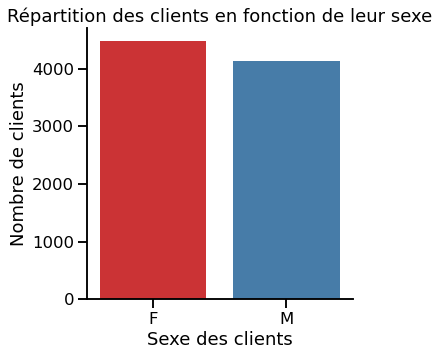

In [5]:
sns.set_context('talk')
sns.set_palette('Set1')
plt.figure(figsize = (10,10))

g = sns.catplot('sex', data=custom, kind='count')
g = plt.xlabel('Sexe des clients')
g = plt.ylabel('Nombre de clients')
g = plt.title('Répartition des clients en fonction de leur sexe')
plt.show()

Le nombre d'hommes et de femmes est équivalent. 

In [6]:
custom_f = custom[custom['sex']=='F']
custom_m = custom[custom['sex']=='M']

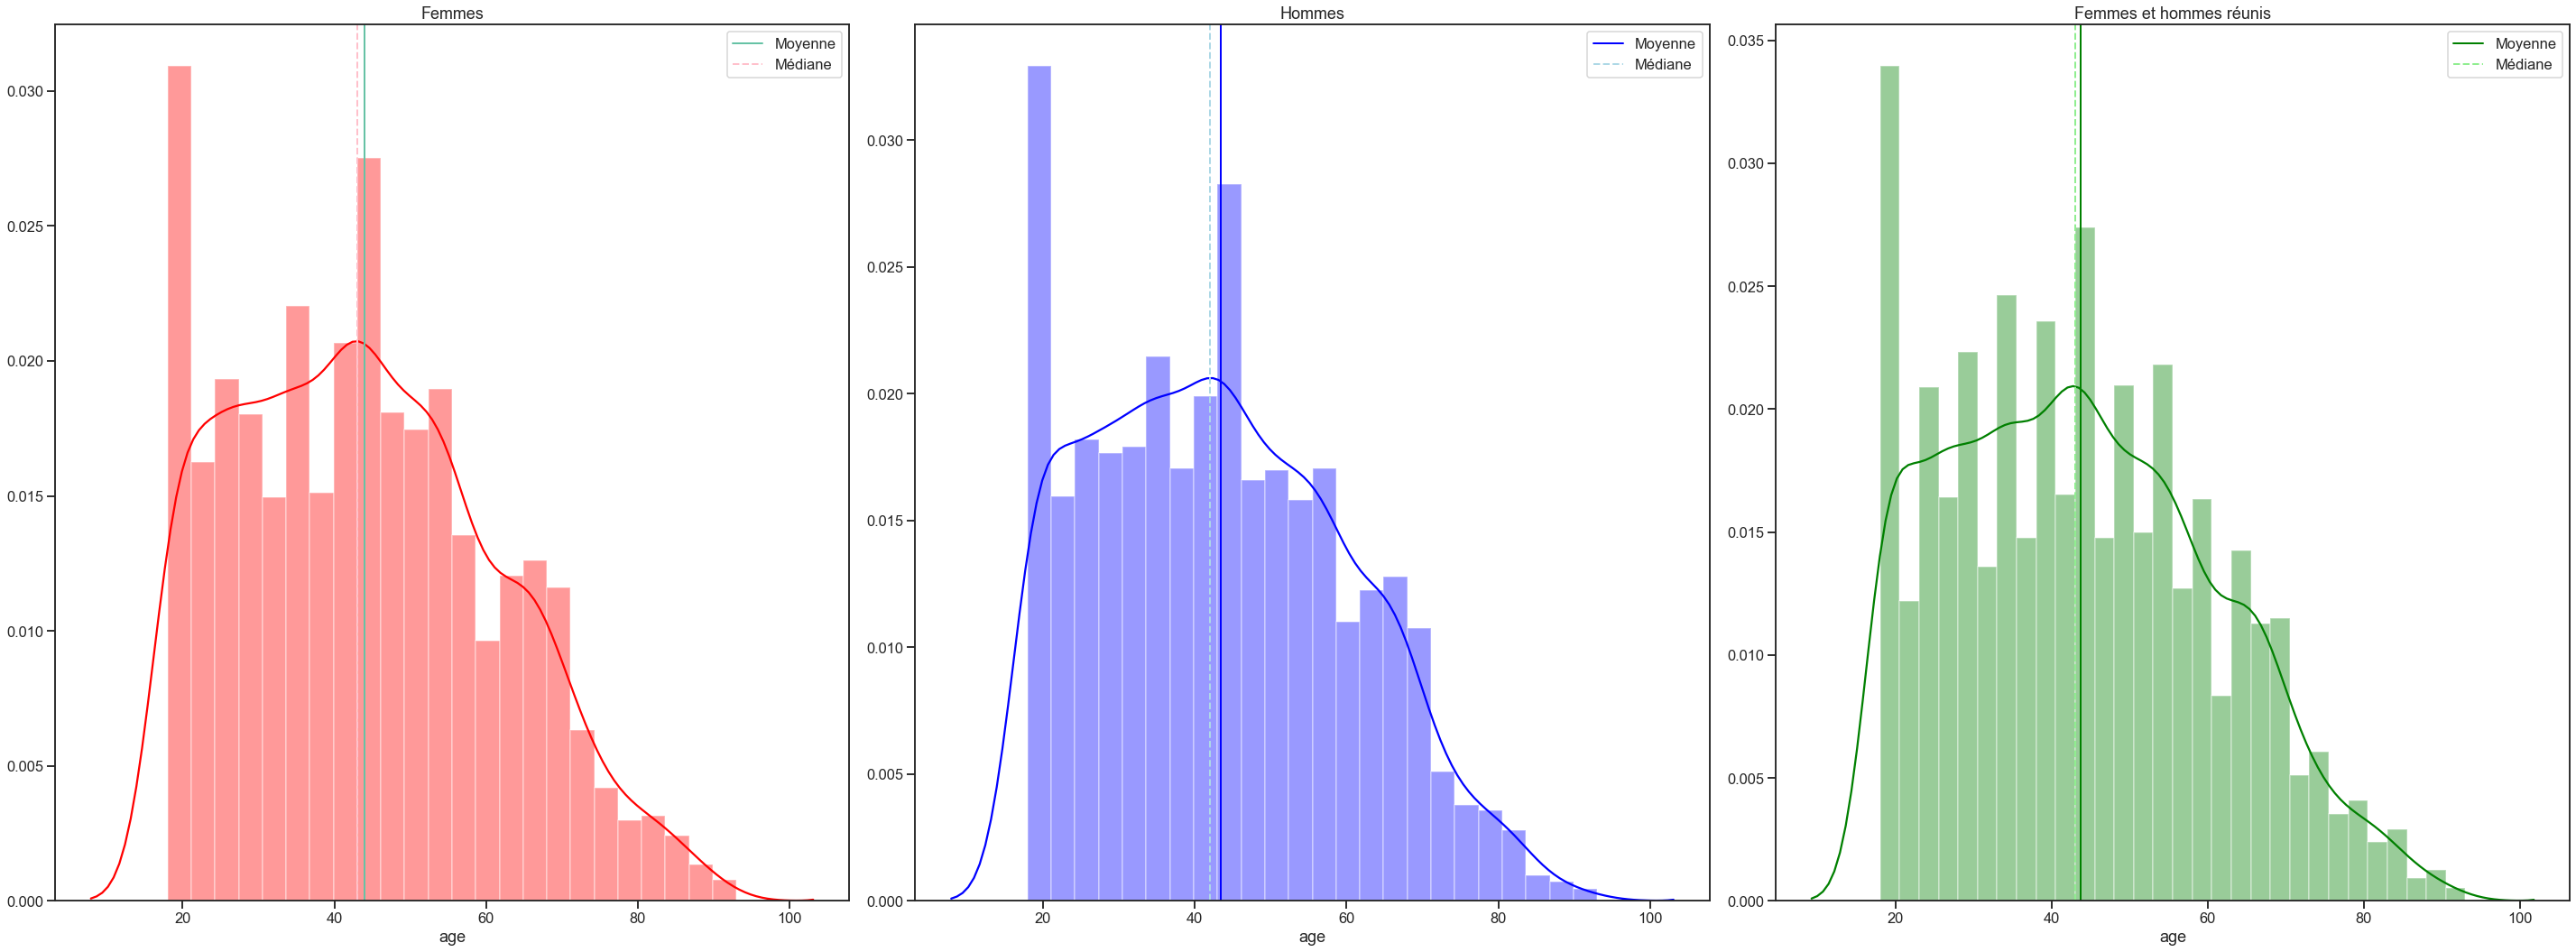

In [58]:
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize = (40,15))

plt.subplot(1, 3, 1)
g = sns.distplot(custom_f['age'], color='red')
g = plt.axvline(x=custom_f['age'].mean(), label='Moyenne', linestyle='-', linewidth=2)
g = plt.axvline(x=custom_f['age'].median(), label='Médiane', linestyle='--', linewidth=2, color='pink')
g = plt.title('Femmes')
plt.legend()

plt.subplot(1,3,2)
g = sns.distplot(custom_m['age'], color='blue')
g = plt.axvline(x=custom_m['age'].mean(), label='Moyenne', linestyle='-', linewidth=2, color='b')
g = plt.axvline(x=custom_m['age'].median(), label='Médiane', linestyle='--', linewidth=2, color='lightblue')
g = plt.title('Hommes')
plt.legend()

plt.subplot(1,3,3)
g = sns.distplot(custom['age'], color='green')
g = plt.axvline(x=custom['age'].mean(), label='Moyenne', linestyle='-', linewidth=2, color='g')
g = plt.axvline(x=custom['age'].median(), label='Médiane', linestyle='--', linewidth=2, color='lightgreen')
g = plt.title('Femmes et hommes réunis')
plt.legend()

plt.tight_layout()

plt.show()

In [8]:
fem_skew = stats.skew(custom_f['age'])
mal_skew = stats.skew(custom_m['age'])
skew_total = stats.skew(custom['age'])
print('Skewness Femmes = ' + str(fem_skew) + ' ; Skewness Hommes = ' + str(mal_skew) + ' ; Skewness Total = ' + str(skew_total))

Skewness Femmes = 0.3733111568791258 ; Skewness Hommes = 0.3438126359703028 ; Skewness Total = 0.36075109938550914


Le fichier client contient 8621 clients. On compte 4490 femmes et 4131 hommes. Concernant la répartition des âges, l'âge moyen dans les deux échantillons est au alentour de 44 ans. Cependant, on observe un mode dans la première classe (18 - 31 ans). Ce mode peut être expliqué par l'âge minimum d'inscription sur le site. En effet, l'âge minimum est de 18 ans donc il est possible que des personnes n'ayant pas l'âge minimum s'inscrive en se plaçant dans cette catégorie. 

## Analyse des produits

On réinitile l'index de la table des produits et on modifie le type des catégories. 

In [9]:
prod.reset_index()
prod = prod[['id_prod', 'price', 'categ']]
prod['categ'] = prod['categ'].astype('category')
print(prod.head())
prod.dtypes

  id_prod  price categ
0  0_1421  19.99     0
1  0_1368   5.13     0
2   0_731  17.99     0
3   1_587   4.99     1
4  0_1507   3.99     0


id_prod      object
price       float64
categ      category
dtype: object

On regarde la distribution des prix des produits indépendamment de leur catégorie. 

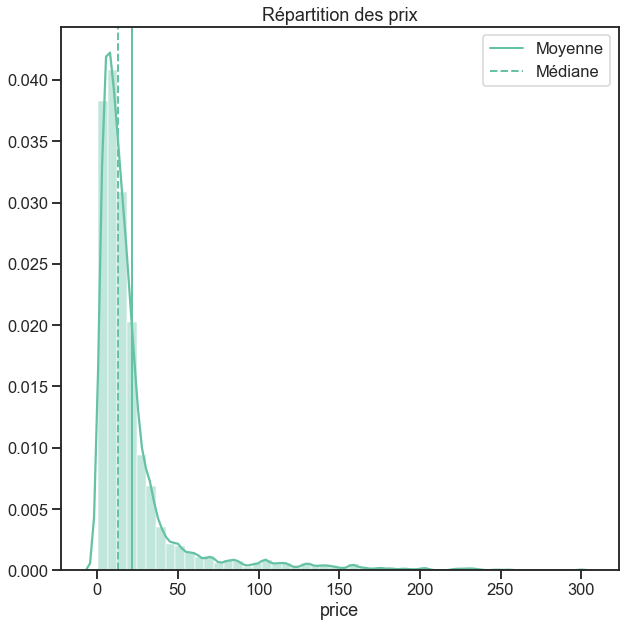

In [57]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize = (10,10))

g = sns.distplot(prod['price'])
g = plt.axvline(x=prod['price'].mean(), label='Moyenne', linestyle='-', linewidth=2)
g = plt.axvline(x=prod['price'].median(), label='Médiane', linestyle='--', linewidth=2)
g = plt.title('Répartition des prix')
plt.legend()

On s'intéresse ensuite à la répartition des prix en fonction de leurs catégories. 

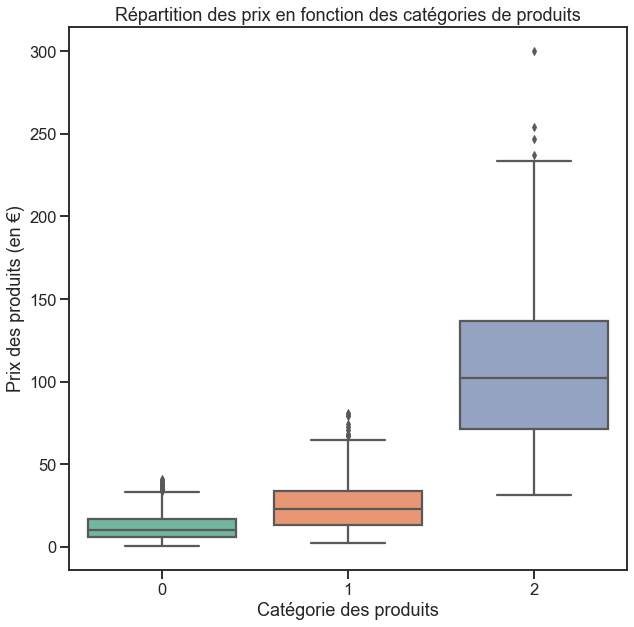

In [11]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize = (10,10))

g = sns.boxplot(data=prod, x='categ', y='price')
g = plt.xlabel('Catégorie des produits')
g = plt.ylabel('Prix des produits (en €)')
g = plt.title('Répartition des prix en fonction des catégories de produits')
plt.show()

La liste des produits contient 3286 produits. Ces produits sont répartis en trois catégories. La catégorie 0 contient des produits dont le prix maximum est inférieur à 50€, la catégorie 1 contient des produits dont le prix maximum est comprits entre 50 et 100€. Enfin, la catégorie 2 contient des produits dont la valeur médiane est de 100€. 

## Analyse des transactions

On modifie la date pour la transformer en type datetime puis on l'affiche uniquement sous la forme 'année-mois-jour' puis on crée une nouvelle colonne contenant uniquement le mois et l'année. 

In [12]:
sells['date'] = pd.to_datetime(sells['date'])
sells['date'] = sells['date'].apply(lambda x: x.strftime("%a %d %b %Y"))
sells['date'] = pd.to_datetime(sells['date'])
sells['mois-année'] = sells['date'].apply(lambda x: x.strftime("%b %Y"))
sells.head()

,date,id_prod,session_id,client_id,mois-année
0,2021-03-01,0_1259,s_1,c_329,Mar 2021
1,2021-03-01,0_1390,s_2,c_664,Mar 2021
2,2021-03-01,0_1352,s_3,c_580,Mar 2021
3,2021-03-01,0_1458,s_4,c_7912,Mar 2021
4,2021-03-01,0_1358,s_5,c_2033,Mar 2021


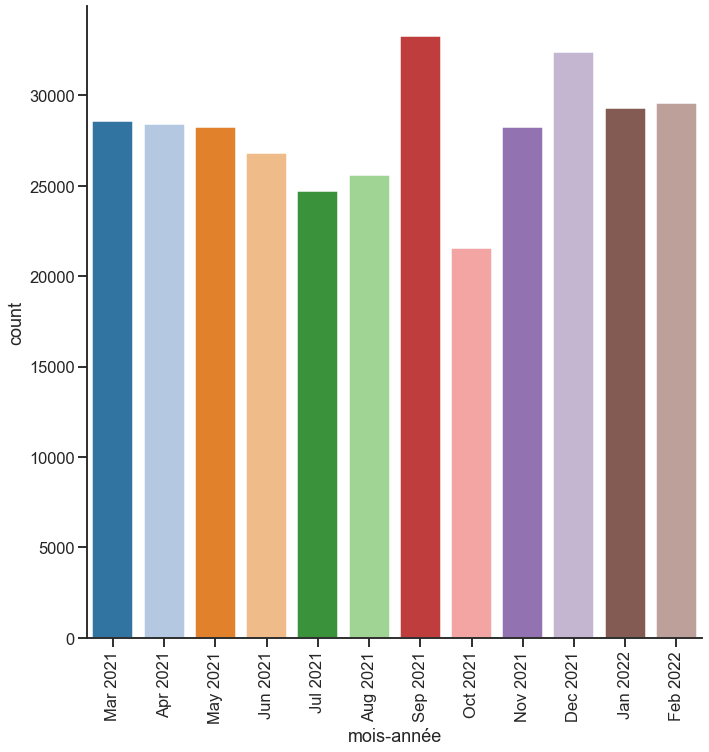

In [56]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('tab20')

g = sns.catplot('mois-année', data=sells, kind='count', height=10)
g = plt.xticks(rotation=90)

plt.show()

On observe un pic des ventes en septembre avec une forte baisse en octobre. Il peut être intéressant de voir plus en détail ce qui s'est passé sur ces dates. 

In [20]:
df = pd.merge(sells, custom, on = 'client_id')
df = pd.merge(df, prod, on = 'id_prod')
df['cumprice'] = df['price'].cumsum()

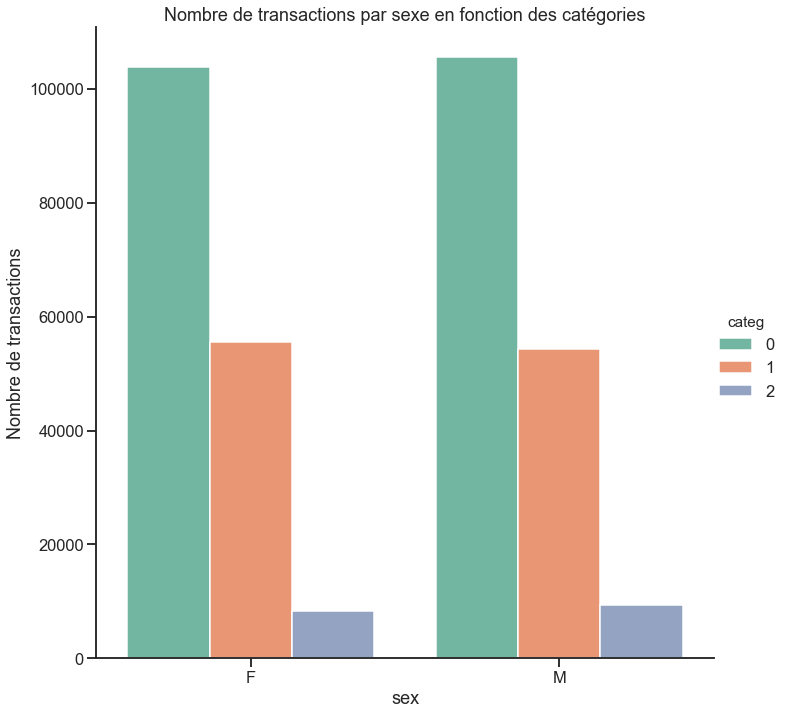

In [54]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')

g = sns.catplot('sex', hue='categ', data=df, kind='count', height=10)
g = plt.ylabel('Nombre de transactions')
g = plt.title('Nombre de transactions par sexe en fonction des catégories')
plt.show()

On observe que le sexe n'a pas d'influence sur les catégories d'achat. Les clients achetent énormément de produits de la catégorie 0 et mmoins de la catégorie 2.

# Analyse de concentration

In [21]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

X = np.array(df['cumprice'])
gini(X)

0.32669566276625783

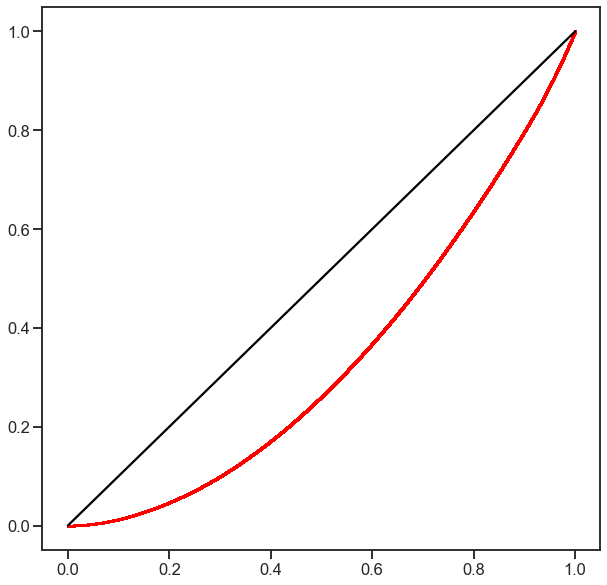

In [22]:
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

fig, ax = plt.subplots(figsize=[10,10])
ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, color='red', s=1)
ax.plot([0,1], [0,1], color='k')

# Analyses bivariées

Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

In [23]:
df_categ = df[['sex', 'categ']]
df_categ = df_categ.astype('str')

In [24]:
X = 'sex'
Y = 'categ'
cont = df_categ[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name='Total')

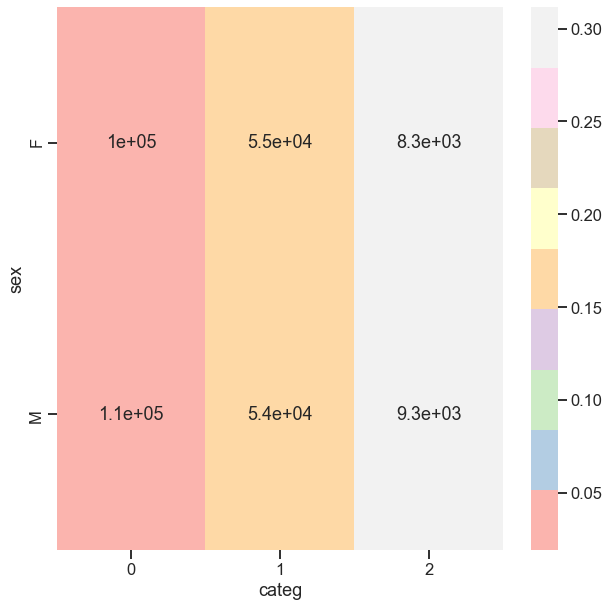

In [52]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_categ)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
plt.figure(figsize = (10,10))
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], cmap='Pastel1')
plt.show()

In [26]:
st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(cont)
print('chi-squared :', st_chi2)
print('p-value :', st_p)

chi-squared : 81.86933350990711
p-value : 1.467788236006804e-15


Y a-t-il une corrélation entre l'âge des clients et le montant total des achats ?

In [27]:
df = df.sort_values('age')
df_age = df.groupby('age').agg('sum').reset_index()

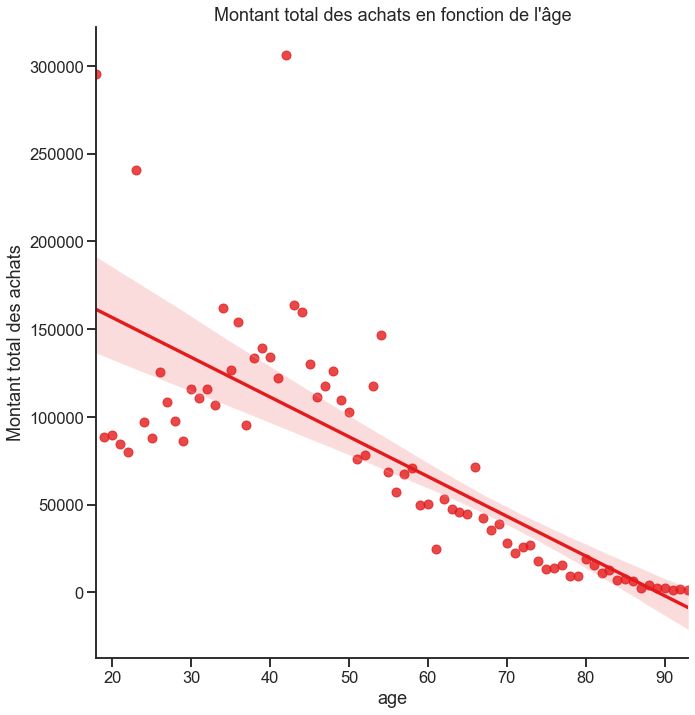

In [49]:
sns.set_context('talk')
sns.set_palette('Set1')

g = sns.lmplot('age', 'price', data=df_age, height=10)
g = plt.ylabel('Montant total des achats')
g = plt.title('Montant total des achats en fonction de l\'âge')
plt.show()

In [29]:
x = df_age['age']
y = df_age['price']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print('slope:', slope)
print('intercept:', intercept)
print('p-value:', p_value)

r-squared: 0.6000951467474378
slope: -2264.8683547505384
intercept: 201970.95382023492
p-value: 2.2152035287518593e-16


Y a-t-il une corrélation entre l'âge des clients et la fréquence d’achat (ie. nombre d'achats par mois par exemple) ?

A finir : regression linéaire

Y a-t-il une corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles) ?

In [30]:
df_pan_count = df[['session_id','id_prod']]
df_pan_count['count'] = 1
df_pan_count = df_pan_count.sort_values('session_id')
df_pan_count = df_pan_count.groupby('session_id').sum()
df_pan_count = df_pan_count.reset_index()

df_pan_moy = df[['session_id', 'id_prod', 'client_id', 'age']]
df_pan_moy = pd.merge(df_pan_moy, df_pan_count, on = 'session_id')

C:\Users\cecil\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


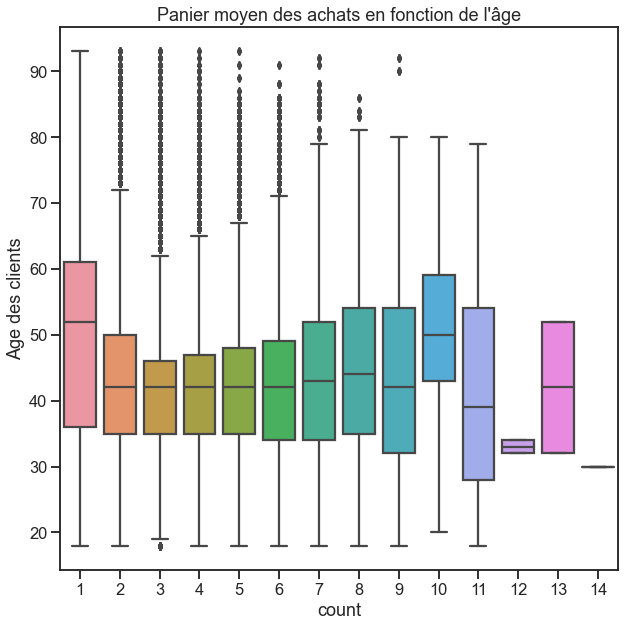

In [31]:
sns.set_context('talk')
sns.set_palette('Set1')
plt.figure(figsize=[10,10])

g = sns.boxplot(x='count', y='age', data=df_pan_moy)
g = plt.ylabel('Age des clients')
g = plt.title('Panier moyen des achats en fonction de l\'âge')
plt.show()

In [32]:
print(stats.f_oneway(df_pan_moy['count'], df_pan_moy['age']))

F_onewayResult(statistic=3105460.782290839, pvalue=0.0)


Y a-t-il une corrélation entre l'âge des clients et les catégories de produits achetés ?

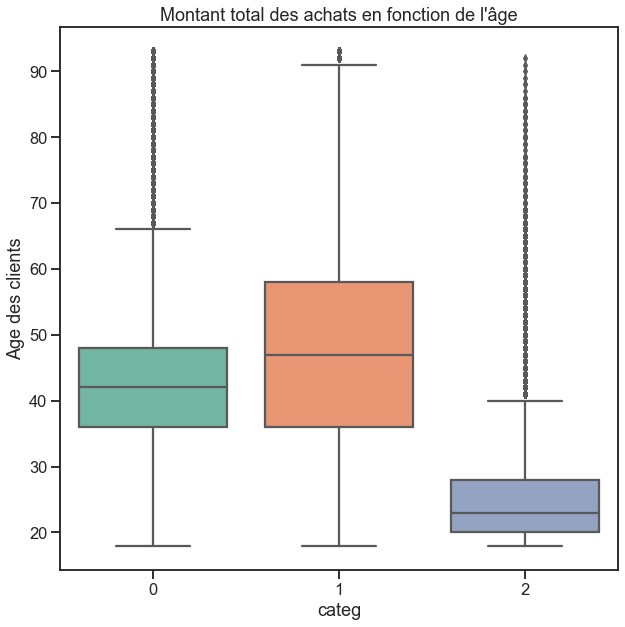

In [35]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

g = sns.boxplot(x='categ', y='age', data=df)
g = plt.ylabel('Age des clients')
g = plt.title('Montant total des achats en fonction de l\'âge')
plt.show()

In [34]:
print(stats.f_oneway(df['categ'], df['age']))

F_onewayResult(statistic=3516212.88929369, pvalue=0.0)
